In [1]:
import pandas as pd
import seaborn as sns
from ydata_profiling import ProfileReport
import statistics as st
from sklearn.metrics import matthews_corrcoef
import category_encoders as ce

In [36]:
data = pd.read_csv('data/wine.csv')

In [37]:
data.shape

(129971, 13)

In [38]:
data['price'].max()

3300.0

In [39]:
mask = data.duplicated()
data[mask].shape

(9983, 13)

In [40]:
data = data.drop_duplicates()
data.shape

(119988, 13)

In [41]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 119988 entries, 0 to 129970
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   country                119929 non-null  object 
 1   description            119988 non-null  object 
 2   designation            85443 non-null   object 
 3   points                 119988 non-null  int64  
 4   price                  111593 non-null  float64
 5   province               119929 non-null  object 
 6   region_1               100428 non-null  object 
 7   region_2               46769 non-null   object 
 8   taster_name            95071 non-null   object 
 9   taster_twitter_handle  90542 non-null   object 
 10  title                  119988 non-null  object 
 11  variety                119987 non-null  object 
 12  winery                 119988 non-null  object 
dtypes: float64(1), int64(1), object(11)
memory usage: 12.8+ MB


<Axes: >

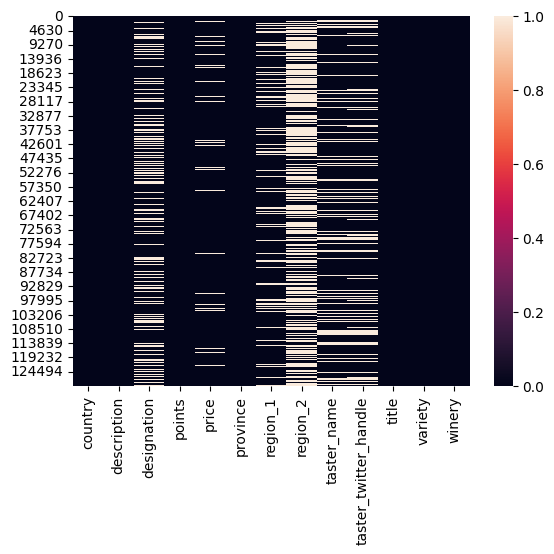

In [42]:
sns.heatmap(data.isnull())

In [43]:
df = data.drop(['region_2'], axis=1)

In [44]:
df.describe(include='all')

country                                        description designation  \
count   119929                                             119988       85443   
unique      43                                             119955       37979   
top         US  This opens with subtle aromas of wild flower a...     Reserve   
freq     50457                                                  2        1871   
mean       NaN                                                NaN         NaN   
std        NaN                                                NaN         NaN   
min        NaN                                                NaN         NaN   
25%        NaN                                                NaN         NaN   
50%        NaN                                                NaN         NaN   
75%        NaN                                                NaN         NaN   
max        NaN                                                NaN         NaN   

               points          price    province     region_1 taster_name  \
count   119988.000000  111593.000000      119929       100428       95071   
unique            NaN            NaN         425         1229          19   
top               NaN            NaN  California  Napa Valley  Roger Voss   
freq              NaN            NaN       33656         4174       23560   
mean        88.442236      35.620747         NaN          NaN         NaN   
std          3.092915      42.103728         NaN          NaN         NaN   
min         80.000000       4.000000         NaN          NaN         NaN   
25%         86.000000      17.000000         NaN          NaN         NaN   
50%         88.000000      25.000000         NaN          NaN         NaN   
75%         91.000000      42.000000         NaN          NaN         NaN   
max        100.000000    3300.000000         NaN          NaN         NaN   

       taster_twitter_handle  \
count                  90542   
unique                    15   
top               @vossroger   
freq                   23560   
mean                     NaN   
std                      NaN   
min                      NaN   
25%                      NaN   
50%                      NaN   
75%                      NaN   
max                      NaN   

                                                    title     variety  \
count                                              119988      119987   
unique                                             118840         707   
top     Gloria Ferrer NV Sonoma Brut Sparkling (Sonoma...  Pinot Noir   
freq                                                    9       12278   
mean                                                  NaN         NaN   
std                                                   NaN         NaN   
min                                                   NaN         NaN   
25%                                                   NaN         NaN   
50%                                                   NaN         NaN   
75%                                                   NaN         NaN   
max                                                   NaN         NaN   

                    winery  
count               119988  
unique               16757  
top     Wines & Winemakers  
freq                   211  
mean                   NaN  
std                    NaN  
min                    NaN  
25%                    NaN  
50%                    NaN  
75%                    NaN  
max                    NaN

In [45]:
# обрабатываем пропуски в категориальных признаках самым простым вариантом, замена на unknown

df['designation'] = df['designation'].fillna('unknown')
df['region_1'] = df['region_1'].fillna('unknown')
df['taster_name'] = df['taster_name'].fillna('unknown')
df['taster_twitter_handle'] = df['taster_twitter_handle'].fillna('unknown')

# признаки с маленьким количеством пропусков заменим на самые частовречающиеся значения
df['country'] = df['country'].fillna('US')
df['price'] = df['price'].fillna(df['price'].mean())
df['province'] = df['province'].fillna('California')
df['variety'] = df['variety'].fillna('Pinot Noir')

In [46]:
# в числовом признаке выберем метод замены средним значением
df['price'] = df['price'].fillna(df['price'].mean())

In [47]:
# сохраняем очищенный датасет для дальнейшей работы
df.to_csv('data/wine_cleared.csv', index=False) 

In [50]:
profile = ProfileReport(df, title="Pandas Profiling Report")

profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
profile.to_file("your_report.html")

In [1]:
import statistics

In [12]:
df=pd.read_csv('data/wine_cleared.csv') 

In [17]:
# Вычислите среднюю стоимость бутылки вина при помощи функции statistics.mean() библиотеки statistics. 
st.mode(df['price'])

35.363389129985535

In [16]:
df['price'].median()

28.0

In [20]:
df.corr(numeric_only=True)

Unnamed: 0    points     price
Unnamed: 0    1.000000  0.007124  0.004652
points        0.007124  1.000000  0.402137
price         0.004652  0.402137  1.000000

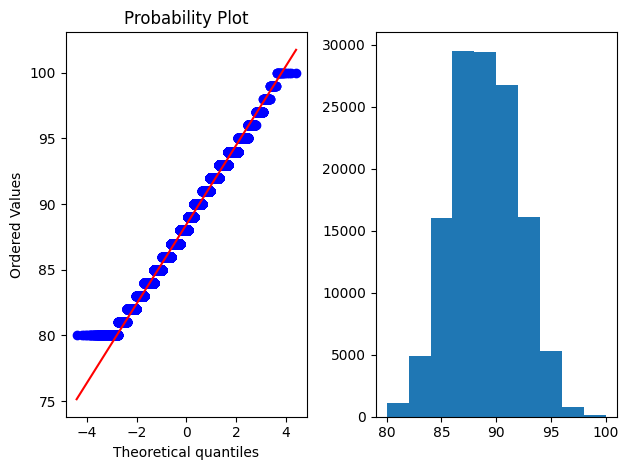

In [22]:
import matplotlib.pyplot as plt # библиотека визуализации
from scipy import stats # библиотека для расчетов

plt.subplot(1, 2, 1) # задаем сетку рисунка количество строк и столбцов
stats.probplot(df['points'], plot=plt) # qq plot

plt.subplot(1, 2, 2) # располагаем второй рисунок рядом
plt.hist(df['points']) # гистограмма распределения признака

plt.tight_layout() # чтобы графики не наезжали другу на друга, используем tight_layout

plt.show() # просмотр графика

In [23]:
df.corr(method = 'spearman', numeric_only=True)

Unnamed: 0    points     price
Unnamed: 0    1.000000  0.009378  0.003751
points        0.009378  1.000000  0.581095
price         0.003751  0.581095  1.000000

In [24]:
df.corr(method = 'kendall', numeric_only=True)

Unnamed: 0    points     price
Unnamed: 0    1.000000  0.006536  0.002533
points        0.006536  1.000000  0.433498
price         0.002533  0.433498  1.000000

In [26]:
x = [+1, -1, +1, +1] # список значений признака х
y = [+1, +1, +1, -1] # список значений признака y

matthews_corrcoef(x, y) # рассчитаем коэффициент корреляции Мэтьюса

-0.3333333333333333

In [27]:
data = pd.read_csv('data/model.csv')

In [29]:
data.corr(numeric_only=True)

Year     Waist      Hips    Height    Weight       BMI  \
Year       1.000000  0.292518 -0.281576  0.284482 -0.010753  0.025309   
Waist      0.292518  1.000000  0.283060  0.372637  0.452704  0.136549   
Hips      -0.281576  0.283060  1.000000  0.228054  0.541836  0.211395   
Height     0.284482  0.372637  0.228054  1.000000  0.706569 -0.037934   
Weight    -0.010753  0.452704  0.541836  0.706569  1.000000  0.212701   
BMI        0.025309  0.136549  0.211395 -0.037934  0.212701  1.000000   
Waist/Hip  0.458945  0.742284 -0.422412  0.198754  0.067543 -0.010173   

           Waist/Hip  
Year        0.458945  
Waist       0.742284  
Hips       -0.422412  
Height      0.198754  
Weight      0.067543  
BMI        -0.010173  
Waist/Hip   1.000000

<Axes: >

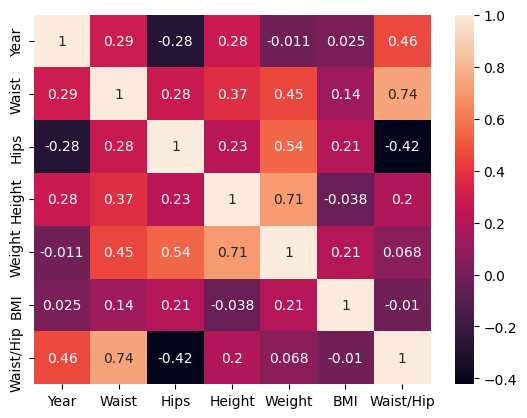

In [32]:
sns.heatmap(data.corr(numeric_only=True), annot = True)

<Axes: xlabel='Waist/Hip', ylabel='Waist'>

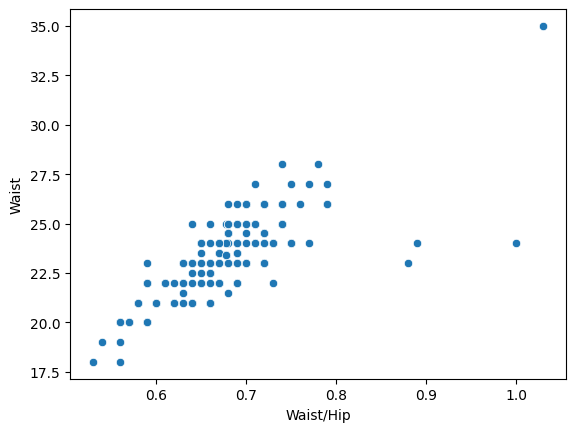

In [33]:
sns.scatterplot(data=data, x="Waist/Hip", y="Waist")

<Axes: xlabel='Weight', ylabel='Year'>

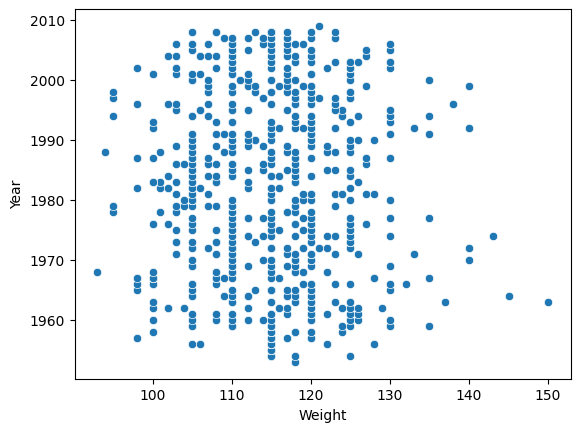

In [34]:
sns.scatterplot(data=data, x="Weight", y="Year")

c:\Users\redd-\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


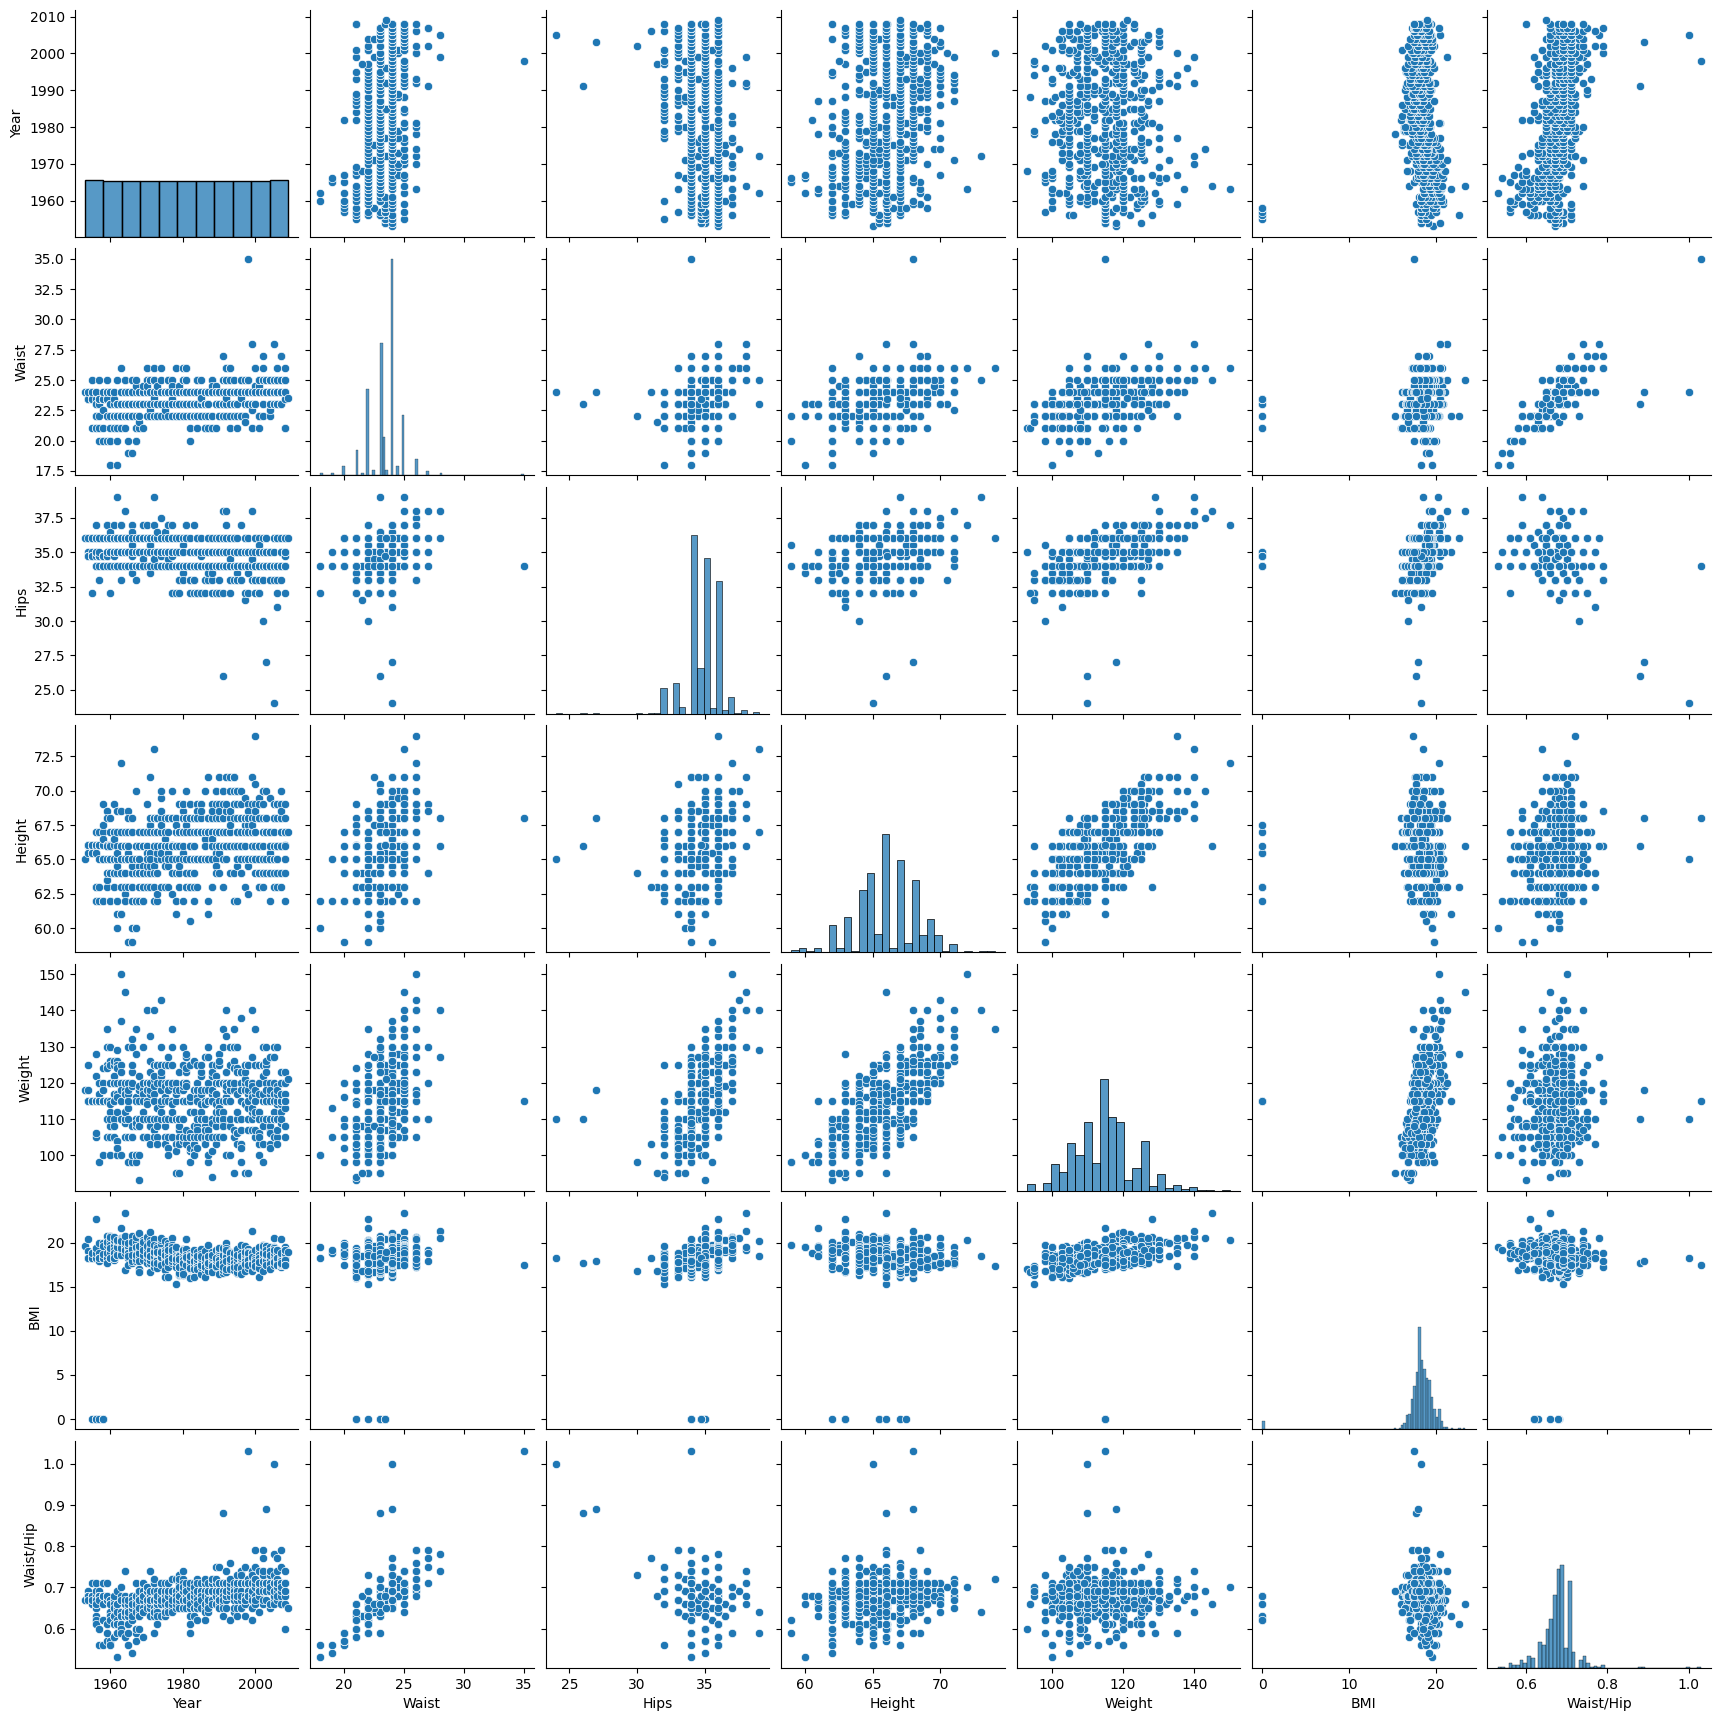

In [35]:
sns.pairplot(data)

In [37]:
st.mean(data['Weight'])

114.93606557377049

In [38]:
st.mean(data['Height'])

66.05725806451613

## проектирование признаков

In [5]:
data = pd.read_csv('data/wine_cleared.csv')

In [4]:
# Создадим новый признак price_round, означающий округлённую до целого числа цену за бутылку вина:

# для удобства сразу преобразуем признак в int
data['price_round'] = data['price'].round().astype(int)

In [5]:
regex = '\d{4}' # регулярное выражение для нахождения чисел
data['year'] = data['title'].str.findall(regex).str.get(0)

In [6]:
data['country'].value_counts()

country
US                        54504
France                    22093
Italy                     19540
Spain                      6645
Portugal                   5691
Chile                      4472
Argentina                  3800
Austria                    3345
Australia                  2329
Germany                    2165
New Zealand                1419
South Africa               1401
Israel                      505
Greece                      466
Canada                      257
Hungary                     146
Bulgaria                    141
Romania                     120
Uruguay                     109
Turkey                       90
Slovenia                     87
Georgia                      86
England                      74
Croatia                      73
Mexico                       70
Moldova                      59
Brazil                       52
Lebanon                      35
Morocco                      28
Peru                         16
Ukraine                      14


In [7]:
data['is_usa'] = data['country'].apply(lambda x: 1 if x == 'US' else 0)
data['is_france'] = data['country'].apply(lambda x: 1 if x == 'France' else 0)
data['is_italy'] = data['country'].apply(lambda x: 1 if x == 'Italy' else 0)

In [8]:
data['is_france'].sum()

22093

In [9]:
data['is_italy'].sum()

19540

In [21]:
data['year'].isna().value_counts()

year
False    125362
True       4609
Name: count, dtype: int64

In [36]:
data['year'][data['year']=='2020'].value_counts()

year
2020    4609
Name: count, dtype: int64

In [34]:
data['year'] = data['year'].fillna(value='2020')

In [35]:
data['year'].isna().value_counts()

year
False    129971
Name: count, dtype: int64

In [37]:
data['old_wine'] = data['year'].apply(lambda x: 1 if int(x) < 2010 else 0)

In [38]:
data['old_wine'].sum()

39781

In [9]:
display(data['title'].iloc[129966])


'Dr. H. Thanisch (Erben Müller-Burggraef) 2013 Brauneberger Juffer-Sonnenuhr Spätlese Riesling (Mosel)'

In [10]:
def place(pl):
    pl = pl.split('(')[-1]
    pl=pl[:-1]
    return pl

loct = 'Dr. H. Thanisch (Erben Müller-Burggraef) 2013 Brauneberger Juffer-Sonnenuhr Spätlese Riesling (Mosel)'
print(place(loct))

Mosel


In [11]:
data['locality']=data['title'].apply(place)

In [12]:
display(data)

Unnamed: 0   country  \
0                0     Italy   
1                1  Portugal   
2                2        US   
3                3        US   
4                4        US   
...            ...       ...   
129966      129966   Germany   
129967      129967        US   
129968      129968    France   
129969      129969    France   
129970      129970    France   

                                              description  \
0       Aromas include tropical fruit, broom, brimston...   
1       This is ripe and fruity, a wine that is smooth...   
2       Tart and snappy, the flavors of lime flesh and...   
3       Pineapple rind, lemon pith and orange blossom ...   
4       Much like the regular bottling from 2012, this...   
...                                                   ...   
129966  Notes of honeysuckle and cantaloupe sweeten th...   
129967  Citation is given as much as a decade of bottl...   
129968  Well-drained gravel soil gives this wine its c...   
129969  A dry style of Pinot Gris, this is crisp with ...   
129970  Big, rich and off-dry, this is powered by inte...   

                                   designation  points      price  \
0                                 Vulkà Bianco      87  35.363389   
1                                     Avidagos      87  15.000000   
2                                      unknown      87  14.000000   
3                         Reserve Late Harvest      87  13.000000   
4           Vintner's Reserve Wild Child Block      87  65.000000   
...                                        ...     ...        ...   
129966  Brauneberger Juffer-Sonnenuhr Spätlese      90  28.000000   
129967                                 unknown      90  75.000000   
129968                                   Kritt      90  30.000000   
129969                                 unknown      90  32.000000   
129970           Lieu-dit Harth Cuvée Caroline      90  21.000000   

                 province             region_1         taster_name  \
0       Sicily & Sardinia                 Etna       Kerin O’Keefe   
1                   Douro              unknown          Roger Voss   
2                  Oregon    Willamette Valley        Paul Gregutt   
3                Michigan  Lake Michigan Shore  Alexander Peartree   
4                  Oregon    Willamette Valley        Paul Gregutt   
...                   ...                  ...                 ...   
129966              Mosel              unknown  Anna Lee C. Iijima   
129967             Oregon               Oregon        Paul Gregutt   
129968             Alsace               Alsace          Roger Voss   
129969             Alsace               Alsace          Roger Voss   
129970             Alsace               Alsace          Roger Voss   

       taster_twitter_handle  \
0               @kerinokeefe   
1                 @vossroger   
2                @paulgwine    
3                    unknown   
4                @paulgwine    
...                      ...   
129966               unknown   
129967           @paulgwine    
129968            @vossroger   
129969            @vossroger   
129970            @vossroger   

                                                    title         variety  \
0                       Nicosia 2013 Vulkà Bianco  (Etna)     White Blend   
1           Quinta dos Avidagos 2011 Avidagos Red (Douro)  Portuguese Red   
2           Rainstorm 2013 Pinot Gris (Willamette Valley)      Pinot Gris   
3       St. Julian 2013 Reserve Late Harvest Riesling ...        Riesling   
4       Sweet Cheeks 2012 Vintner's Reserve Wild Child...      Pinot Noir   
...                                                   ...             ...   
129966  Dr. H. Thanisch (Erben Müller-Burggraef) 2013 ...        Riesling   
129967                  Citation 2004 Pinot Noir (Oregon)      Pinot Noir   
129968  Domaine Gresser 2013 Kritt Gewurztraminer (Als...  Gewürztraminer   
129969      Domaine Marcel Deiss 2012 Pinot Gris (Alsace)      Pi

In [15]:
import re

In [33]:
result = re.split(r'\(|\)', 'Dr. H. Thanisch (Erben Müller-Burggraef) 2013 Brauneberger Juffer-Sonnenuhr Spätlese Riesling (Mosel)')
result2 = re.split(r'\(|\)', 'Domaine Marcel Deiss 2012 Pinot Gris (Alsace)')[-2]
print(result2)
data['locality']=data['title'].apply(lambda x: re.split(r'\(|\)', x)[-2]) #это правильно вау.

Alsace


In [35]:
country_population = pd.read_csv('data/country_population.csv', sep=';')

In [36]:
country_population[country_population['country']=='Italy']

country  population
24   Italy  59,097,904

In [38]:
data = data.join(country_population.set_index('country'), on='country')
data.head()

Unnamed: 0   country                                        description  \
0           0     Italy  Aromas include tropical fruit, broom, brimston...   
1           1  Portugal  This is ripe and fruity, a wine that is smooth...   
2           2        US  Tart and snappy, the flavors of lime flesh and...   
3           3        US  Pineapple rind, lemon pith and orange blossom ...   
4           4        US  Much like the regular bottling from 2012, this...   

                          designation  points      price           province  \
0                        Vulkà Bianco      87  35.363389  Sicily & Sardinia   
1                            Avidagos      87  15.000000              Douro   
2                             unknown      87  14.000000             Oregon   
3                Reserve Late Harvest      87  13.000000           Michigan   
4  Vintner's Reserve Wild Child Block      87  65.000000             Oregon   

              region_1         taster_name taster_twitter_handle  \
0                 Etna       Kerin O’Keefe          @kerinokeefe   
1              unknown          Roger Voss            @vossroger   
2    Willamette Valley        Paul Gregutt           @paulgwine    
3  Lake Michigan Shore  Alexander Peartree               unknown   
4    Willamette Valley        Paul Gregutt           @paulgwine    

                                               title         variety  \
0                  Nicosia 2013 Vulkà Bianco  (Etna)     White Blend   
1      Quinta dos Avidagos 2011 Avidagos Red (Douro)  Portuguese Red   
2      Rainstorm 2013 Pinot Gris (Willamette Valley)      Pinot Gris   
3  St. Julian 2013 Reserve Late Harvest Riesling ...        Riesling   
4  Sweet Cheeks 2012 Vintner's Reserve Wild Child...      Pinot Noir   

                winery             locality   population  
0              Nicosia                 Etna   59,097,904  
1  Quinta dos Avidagos                Douro   10,347,892  
2            Rainstorm    Willamette Valley  333,022,386  
3           St. Julian  Lake Michigan Shore  333,022,386  
4         Sweet Cheeks    Willamette Valley  333,022,386

In [40]:
country_area = pd.read_csv('data/country_area.csv', sep=';')

In [41]:
data = data.join(country_area.set_index('country'), on='country')
data.head()

Unnamed: 0   country                                        description  \
0           0     Italy  Aromas include tropical fruit, broom, brimston...   
1           1  Portugal  This is ripe and fruity, a wine that is smooth...   
2           2        US  Tart and snappy, the flavors of lime flesh and...   
3           3        US  Pineapple rind, lemon pith and orange blossom ...   
4           4        US  Much like the regular bottling from 2012, this...   

                          designation  points      price           province  \
0                        Vulkà Bianco      87  35.363389  Sicily & Sardinia   
1                            Avidagos      87  15.000000              Douro   
2                             unknown      87  14.000000             Oregon   
3                Reserve Late Harvest      87  13.000000           Michigan   
4  Vintner's Reserve Wild Child Block      87  65.000000             Oregon   

              region_1         taster_name taster_twitter_handle  \
0                 Etna       Kerin O’Keefe          @kerinokeefe   
1              unknown          Roger Voss            @vossroger   
2    Willamette Valley        Paul Gregutt           @paulgwine    
3  Lake Michigan Shore  Alexander Peartree               unknown   
4    Willamette Valley        Paul Gregutt           @paulgwine    

                                               title         variety  \
0                  Nicosia 2013 Vulkà Bianco  (Etna)     White Blend   
1      Quinta dos Avidagos 2011 Avidagos Red (Douro)  Portuguese Red   
2      Rainstorm 2013 Pinot Gris (Willamette Valley)      Pinot Gris   
3  St. Julian 2013 Reserve Late Harvest Riesling ...        Riesling   
4  Sweet Cheeks 2012 Vintner's Reserve Wild Child...      Pinot Noir   

                winery             locality   population       area  
0              Nicosia                 Etna   59,097,904   301230.0  
1  Quinta dos Avidagos                Douro   10,347,892    92391.0  
2            Rainstorm    Willamette Valley  333,022,386  9372610.0  
3           St. Julian  Lake Michigan Shore  333,022,386  9372610.0  
4         Sweet Cheeks    Willamette Valley  333,022,386  9372610.0

In [43]:
data[data['title']=='Gård 2014 Grand Klasse Reserve Lawrence Vineyards Viognier (Columbia Valley (WA))']

Unnamed: 0 country                                        description  \
94          94      US  Barrel notes are prominent, with aromas of Cre...   

                                designation  points  price    province  \
94  Grand Klasse Reserve Lawrence Vineyards      88   22.0  Washington   

                region_1       taster_name taster_twitter_handle  \
94  Columbia Valley (WA)  Sean P. Sullivan         @wawinereport   

                                                title   variety winery  \
94  Gård 2014 Grand Klasse Reserve Lawrence Vineya...  Viognier   Gård   

   locality   population       area  
94      WA)  333,022,386  9372610.0

### Дата время

In [1]:
import pandas as pd 

# инициализируем информацию о звонках
calls_list = [
    [460, '2013-12-17 04:55:39', '2013-12-17 04:55:44', '2013-12-17 04:55:45'],
    [12, '2013-12-16 20:03:20', '2013-12-16 20:03:22', '2013-12-16 20:07:13'],
    [56, '2013-12-16 20:03:20', '2013-12-16 20:03:20', '2013-12-16 20:05:04'],
    [980, '2013-12-16 20:03:20','2013-12-16 20:03:27', '2013-12-16 20:03:29'],
    [396, '2013-12-16 20:08:27', '2013-12-16 20:08:28','2013-12-16 20:12:03'],
    [449, '2013-12-16 20:03:20', '2013-12-16 20:03:25','2013-12-16 20:05:00'],
    [397, '2013-12-16 20:08:25', '2013-12-16 20:08:27', '2013-12-16 20:09:59'],
    [398, '2013-12-16 20:01:23', '2013-12-16 20:01:23', '2013-12-16 20:04:58'],
    [452, '2013-12-16 20:03:20', '2013-12-16 20:03:21','2013-12-16 20:04:55'],
    [440, '2013-12-16 20:03:20', '2013-12-16 20:04:26', '2013-12-16 20:04:32']
]

calls = pd.DataFrame(calls_list, columns = ['client_id',  'agent_date', 'created_at' ,'end_date'])

# преобразовываем признаки в формат datetime для удобной работы

calls['agent_date'] = pd.to_datetime(calls['agent_date'])
calls['created_at'] = pd.to_datetime(calls['created_at'])
calls['end_date'] = pd.to_datetime(calls['end_date'])

calls

client_id          agent_date          created_at            end_date
0        460 2013-12-17 04:55:39 2013-12-17 04:55:44 2013-12-17 04:55:45
1         12 2013-12-16 20:03:20 2013-12-16 20:03:22 2013-12-16 20:07:13
2         56 2013-12-16 20:03:20 2013-12-16 20:03:20 2013-12-16 20:05:04
3        980 2013-12-16 20:03:20 2013-12-16 20:03:27 2013-12-16 20:03:29
4        396 2013-12-16 20:08:27 2013-12-16 20:08:28 2013-12-16 20:12:03
5        449 2013-12-16 20:03:20 2013-12-16 20:03:25 2013-12-16 20:05:00
6        397 2013-12-16 20:08:25 2013-12-16 20:08:27 2013-12-16 20:09:59
7        398 2013-12-16 20:01:23 2013-12-16 20:01:23 2013-12-16 20:04:58
8        452 2013-12-16 20:03:20 2013-12-16 20:03:21 2013-12-16 20:04:55
9        440 2013-12-16 20:03:20 2013-12-16 20:04:26 2013-12-16 20:04:32

In [3]:
calls['time_connection'] = (calls['created_at'] - calls['agent_date']).dt.seconds
calls

client_id          agent_date          created_at            end_date  \
0        460 2013-12-17 04:55:39 2013-12-17 04:55:44 2013-12-17 04:55:45   
1         12 2013-12-16 20:03:20 2013-12-16 20:03:22 2013-12-16 20:07:13   
2         56 2013-12-16 20:03:20 2013-12-16 20:03:20 2013-12-16 20:05:04   
3        980 2013-12-16 20:03:20 2013-12-16 20:03:27 2013-12-16 20:03:29   
4        396 2013-12-16 20:08:27 2013-12-16 20:08:28 2013-12-16 20:12:03   
5        449 2013-12-16 20:03:20 2013-12-16 20:03:25 2013-12-16 20:05:00   
6        397 2013-12-16 20:08:25 2013-12-16 20:08:27 2013-12-16 20:09:59   
7        398 2013-12-16 20:01:23 2013-12-16 20:01:23 2013-12-16 20:04:58   
8        452 2013-12-16 20:03:20 2013-12-16 20:03:21 2013-12-16 20:04:55   
9        440 2013-12-16 20:03:20 2013-12-16 20:04:26 2013-12-16 20:04:32   

   duration  time_connection  
0         1                5  
1       231                2  
2       104                0  
3         2                7  
4       215                1  
5        95                5  
6        92                2  
7       215                0  
8        94                1  
9         6               66

In [4]:
calls['time_connection'].sum()

89

In [5]:
calls['is_connection']=calls['duration'].apply(lambda x: 1 if x>10 else 0)
calls

client_id          agent_date          created_at            end_date  \
0        460 2013-12-17 04:55:39 2013-12-17 04:55:44 2013-12-17 04:55:45   
1         12 2013-12-16 20:03:20 2013-12-16 20:03:22 2013-12-16 20:07:13   
2         56 2013-12-16 20:03:20 2013-12-16 20:03:20 2013-12-16 20:05:04   
3        980 2013-12-16 20:03:20 2013-12-16 20:03:27 2013-12-16 20:03:29   
4        396 2013-12-16 20:08:27 2013-12-16 20:08:28 2013-12-16 20:12:03   
5        449 2013-12-16 20:03:20 2013-12-16 20:03:25 2013-12-16 20:05:00   
6        397 2013-12-16 20:08:25 2013-12-16 20:08:27 2013-12-16 20:09:59   
7        398 2013-12-16 20:01:23 2013-12-16 20:01:23 2013-12-16 20:04:58   
8        452 2013-12-16 20:03:20 2013-12-16 20:03:21 2013-12-16 20:04:55   
9        440 2013-12-16 20:03:20 2013-12-16 20:04:26 2013-12-16 20:04:32   

   duration  time_connection  is_connection  
0         1                5              0  
1       231                2              1  
2       104                0              1  
3         2                7              0  
4       215                1              1  
5        95                5              1  
6        92                2              1  
7       215                0              1  
8        94                1              1  
9         6               66              0

In [6]:
calls['is_connection'].sum()

7

In [7]:
calls['time_diff'] = (calls['end_date'] - calls['agent_date']).dt.seconds
calls

client_id          agent_date          created_at            end_date  \
0        460 2013-12-17 04:55:39 2013-12-17 04:55:44 2013-12-17 04:55:45   
1         12 2013-12-16 20:03:20 2013-12-16 20:03:22 2013-12-16 20:07:13   
2         56 2013-12-16 20:03:20 2013-12-16 20:03:20 2013-12-16 20:05:04   
3        980 2013-12-16 20:03:20 2013-12-16 20:03:27 2013-12-16 20:03:29   
4        396 2013-12-16 20:08:27 2013-12-16 20:08:28 2013-12-16 20:12:03   
5        449 2013-12-16 20:03:20 2013-12-16 20:03:25 2013-12-16 20:05:00   
6        397 2013-12-16 20:08:25 2013-12-16 20:08:27 2013-12-16 20:09:59   
7        398 2013-12-16 20:01:23 2013-12-16 20:01:23 2013-12-16 20:04:58   
8        452 2013-12-16 20:03:20 2013-12-16 20:03:21 2013-12-16 20:04:55   
9        440 2013-12-16 20:03:20 2013-12-16 20:04:26 2013-12-16 20:04:32   

   duration  time_connection  is_connection  time_diff  
0         1                5              0          6  
1       231                2              1        233  
2       104                0              1        104  
3         2                7              0          9  
4       215                1              1        216  
5        95                5              1        100  
6        92                2              1         94  
7       215                0              1        215  
8        94                1              1         95  
9         6               66              0         72

In [8]:
calls['time_diff'].sum()

1144

In [9]:
# удаляем исходные признаки, тк они бесполезны для модели
calls = calls.drop(columns=['agent_date', 'created_at' ,'end_date'], axis=1)

In [11]:
data = pd.read_csv('data/wine_cleared.csv')

In [12]:
regex = '\d{4}' # регулярное выражение для нахождения чисел
data['year'] = data['title'].str.findall(regex).str.get(0)

In [13]:
data['year'] = pd.to_datetime(data['year'], errors = 'coerce')

In [18]:
data['years_diff'] = (pd.to_datetime('2022-01-12') - data['year'])
data['years_diff'].max()

Timedelta('98627 days 00:00:00')

### Категории

In [19]:
import category_encoders as ce

In [2]:
clothing_list = [
    ['xxs', 'dress'],
    ['xxs', 'skirt'],
    ['xs', 'dress'],
    ['s', 'skirt'],
    ['m', 'dress'],
    ['l', 'shirt'],
    ['s', 'coat'],
    ['m', 'coat'],
    ['xxl', 'shirt'],
    ['l', 'dress']
]

clothing = pd.DataFrame(clothing_list, columns = ['size',  'type'])
clothing

size   type
0  xxs  dress
1  xxs  skirt
2   xs  dress
3    s  skirt
4    m  dress
5    l  shirt
6    s   coat
7    m   coat
8  xxl  shirt
9    l  dress

In [3]:
# создаем объект OrdinalEncoder, col - имя столбца, mapping - словарь с описанием кодировки
ord_encoder = ce.OrdinalEncoder(mapping=[{
	'col': 'size',
	'mapping': {'xxs': 1, 'xs': 2, 's': 3, 
                'm': 4, 'l': 5, 'xxl': 6}
}])
# применяем трансформацию к столбцу
data_bin = ord_encoder.fit_transform(clothing[['size']])
# добавляем результат к исходному DataFrame
clothing = pd.concat([clothing, data_bin], axis=1)

clothing

size   type  size
0   xxs  dress     1
1   xxs  skirt     1
2    xs  dress     2
3     s  skirt     3
4     m  dress     4
5     l  shirt     5
6     s   coat     3
7     m   coat     4
8   xxl  shirt     6
9     l  dress     5

In [4]:
# Используем класс OneHotEncoding библиотеки category_encoders. 
# Укажем в cols наименование признака type для кодировки
encoder = ce.OneHotEncoder(cols=['type'], use_cat_names=True) # указываем столбец для кодирования
type_bin = encoder.fit_transform(clothing['type'])
clothing = pd.concat([clothing, type_bin], axis=1)

clothing

size   type  size  type_dress  type_skirt  type_shirt  type_coat
0   xxs  dress     1           1           0           0          0
1   xxs  skirt     1           0           1           0          0
2    xs  dress     2           1           0           0          0
3     s  skirt     3           0           1           0          0
4     m  dress     4           1           0           0          0
5     l  shirt     5           0           0           1          0
6     s   coat     3           0           0           0          1
7     m   coat     4           0           0           0          1
8   xxl  shirt     6           0           0           1          0
9     l  dress     5           1           0           0          0

In [7]:
data['country'].value_counts()

country
US                        54504
France                    22093
Italy                     19540
Spain                      6645
Portugal                   5691
Chile                      4472
Argentina                  3800
Austria                    3345
Australia                  2329
Germany                    2165
New Zealand                1419
South Africa               1401
Israel                      505
Greece                      466
Canada                      257
Hungary                     146
Bulgaria                    141
Romania                     120
Uruguay                     109
Turkey                       90
Slovenia                     87
Georgia                      86
England                      74
Croatia                      73
Mexico                       70
Moldova                      59
Brazil                       52
Lebanon                      35
Morocco                      28
Peru                         16
Ukraine                      14


In [8]:
#кодируем страну двоичным кодированием
bin_encoder = ce.BinaryEncoder(cols=['country']) # указываем столбец для кодирования
type_bin = bin_encoder.fit_transform(data['country'])
data = pd.concat([data, type_bin], axis=1)

In [13]:
data

Unnamed: 0   country  \
0                0     Italy   
1                1  Portugal   
2                2        US   
3                3        US   
4                4        US   
...            ...       ...   
129966      129966   Germany   
129967      129967        US   
129968      129968    France   
129969      129969    France   
129970      129970    France   

                                              description  \
0       Aromas include tropical fruit, broom, brimston...   
1       This is ripe and fruity, a wine that is smooth...   
2       Tart and snappy, the flavors of lime flesh and...   
3       Pineapple rind, lemon pith and orange blossom ...   
4       Much like the regular bottling from 2012, this...   
...                                                   ...   
129966  Notes of honeysuckle and cantaloupe sweeten th...   
129967  Citation is given as much as a decade of bottl...   
129968  Well-drained gravel soil gives this wine its c...   
129969  A dry style of Pinot Gris, this is crisp with ...   
129970  Big, rich and off-dry, this is powered by inte...   

                                   designation  points      price  \
0                                 Vulkà Bianco      87  35.363389   
1                                     Avidagos      87  15.000000   
2                                      unknown      87  14.000000   
3                         Reserve Late Harvest      87  13.000000   
4           Vintner's Reserve Wild Child Block      87  65.000000   
...                                        ...     ...        ...   
129966  Brauneberger Juffer-Sonnenuhr Spätlese      90  28.000000   
129967                                 unknown      90  75.000000   
129968                                   Kritt      90  30.000000   
129969                                 unknown      90  32.000000   
129970           Lieu-dit Harth Cuvée Caroline      90  21.000000   

                 province             region_1         taster_name  \
0       Sicily & Sardinia                 Etna       Kerin O’Keefe   
1                   Douro              unknown          Roger Voss   
2                  Oregon    Willamette Valley        Paul Gregutt   
3                Michigan  Lake Michigan Shore  Alexander Peartree   
4                  Oregon    Willamette Valley        Paul Gregutt   
...                   ...                  ...                 ...   
129966              Mosel              unknown  Anna Lee C. Iijima   
129967             Oregon               Oregon        Paul Gregutt   
129968             Alsace               Alsace          Roger Voss   
129969             Alsace               Alsace          Roger Voss   
129970             Alsace               Alsace          Roger Voss   

       taster_twitter_handle  ... country_1 country_2 country_3  country_4  \
0               @kerinokeefe  ...         0         0         0          0   
1                 @vossroger  ...         0         0         0          1   
2                @paulgwine   ...         0         0         0          1   
3                    unknown  ...         0         0         0          1   
4                @paulgwine   ...         0         0         0          1   
...                      ...  ...       ...       ...       ...        ...   
129966               unknown  ...         0         0         1          1   
129967           @paulgwine   ...         0         0         0          1   
129968            @vossroger  ...         0         0         1          0   
129969            @vossroger  ...         0         0         1          0   
129970            @vossroger  ...         0         0         1          0   

        country_5  taster_twitter_handle_0  taster_twitter_handle_1  \
0               1                        0                        0   
1               0                        0                        0   
2               1                        0                        0   

In [12]:
#кодируем твиттер двоичным кодированием
bin_encoder = ce.BinaryEncoder(cols=['taster_twitter_handle']) # указываем столбец для кодирования
type_bin = bin_encoder.fit_transform(data['taster_twitter_handle'])
data = pd.concat([data, type_bin], axis=1)

## <font color='yellow'>Нормализация. Стандартизация</font>

In [1]:
import numpy as np 
import pandas as pd

np.random.seed(34)

# для нормализации, стандартизации
from sklearn import preprocessing

# Для графиков
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
matplotlib.style.use('ggplot')

# сгенерируем датасет из случайных чисел
df = pd.DataFrame({ 
    # Бета распределение, 5 – значение альфа, 1 – значение бета, 1000 – размер
    'beta': np.random.beta(5, 1, 1000) * 60,
    
    # Экспоненциальное распределение, 10 – "резкость" экспоненты, 1000 – размер
    'exponential': np.random.exponential(10, 1000),
    
    # Нормальное распределение, 10 – среднее значение р., 2 – стандартное отклонение, 1000 – количество сэмплов
    'normal_p': np.random.normal(10, 2, 1000),
    
    # Нормальное распределение, 10 – среднее значение р., 10 – стандартное отклонение, 1000 – количество сэмплов
    'normal_l': np.random.normal(10, 10, 1000),
})

# Копируем названия столбцов, которые теряются при использовании fit_transform()
col_names = list(df.columns)

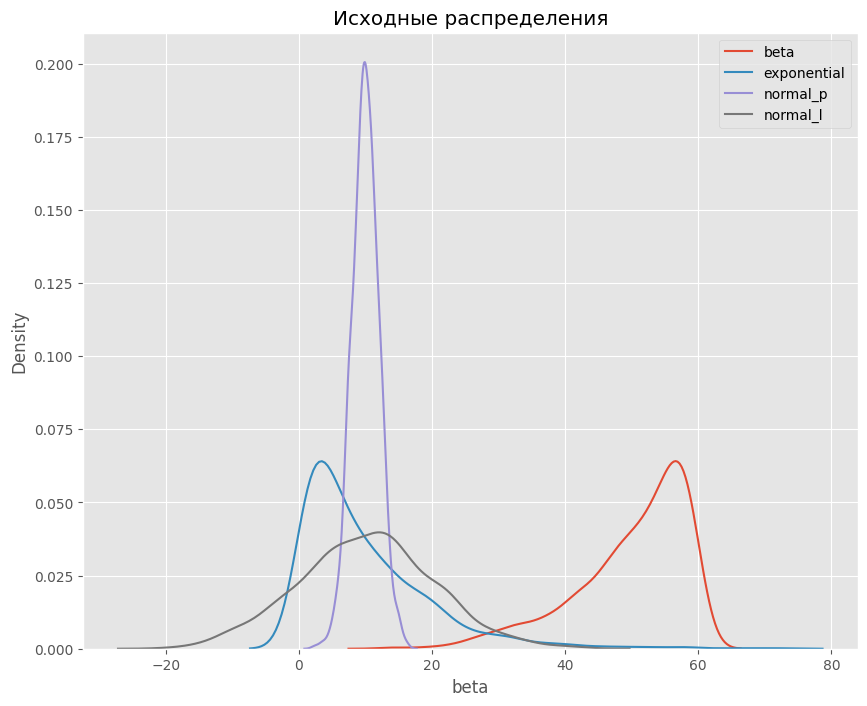

In [3]:
# зададим параметры холста, название и визуализируем кривые распределения:
fig, (ax1) = plt.subplots(ncols=1, figsize=(10, 8))
ax1.set_title('Исходные распределения')

# kdeplot() (KDE – оценка плотности ядра) – специальный метод для графиков распределений
sns.kdeplot(df['beta'], ax=ax1, label ='beta')
sns.kdeplot(df['exponential'], ax=ax1, label ='exponential')
sns.kdeplot(df['normal_p'], ax=ax1, label ='normal_p')
sns.kdeplot(df['normal_l'], ax=ax1, label ='normal_l')
plt.legend()

In [4]:
df.describe()

beta  exponential     normal_p     normal_l
count  1000.000000  1000.000000  1000.000000  1000.000000
mean     50.024249    10.028387     9.994006    10.175745
std       8.474545     9.733928     2.013971    10.104004
min      13.854022     0.007617     2.356844   -19.539980
25%      45.793283     2.951421     8.687478     3.566822
50%      52.337504     7.018565     9.983498    10.326331
75%      56.722191    14.022485    11.306914    16.615057
max      59.990640    71.344341    16.214364    42.072915

<Axes: title={'center': 'После нормализации MinMaxScaler'}, xlabel='beta', ylabel='Density'>

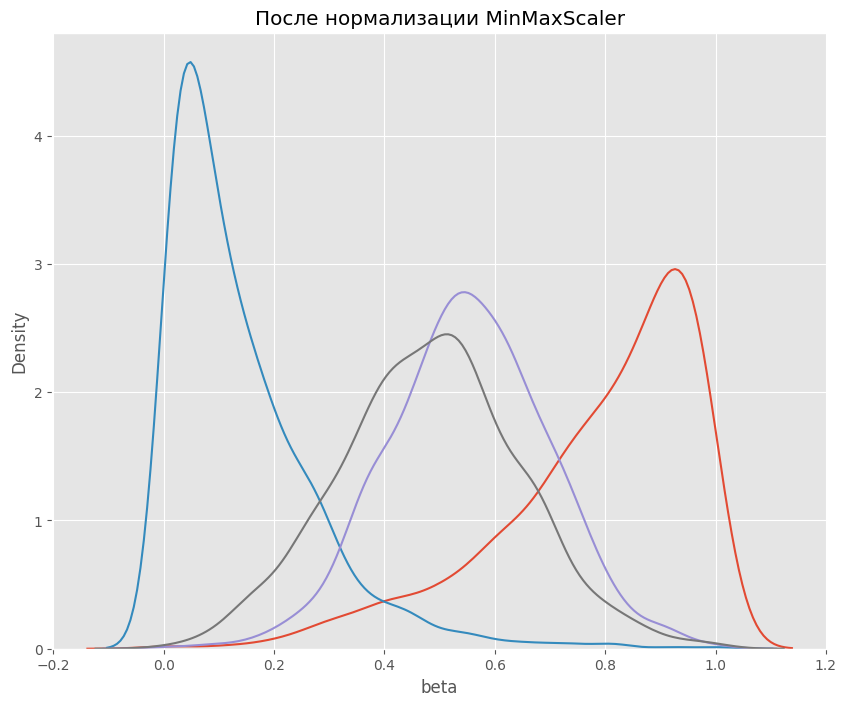

In [7]:
# инициализируем нормализатор MinMaxScaler
mm_scaler = preprocessing.MinMaxScaler()

# кодируем исходный датасет
df_mm = mm_scaler.fit_transform(df)

# Преобразуем промежуточный датасет в полноценный датафрейм для визуализации
df_mm = pd.DataFrame(df_mm, columns=col_names)

fig, (ax1) = plt.subplots(ncols=1, figsize=(10, 8))
ax1.set_title('После нормализации MinMaxScaler')

sns.kdeplot(df_mm['beta'], ax=ax1)
sns.kdeplot(df_mm['exponential'], ax=ax1)
sns.kdeplot(df_mm['normal_p'], ax=ax1)
sns.kdeplot(df_mm['normal_l'], ax=ax1)

<Axes: title={'center': 'Распределения после RobustScaler'}, xlabel='beta', ylabel='Density'>

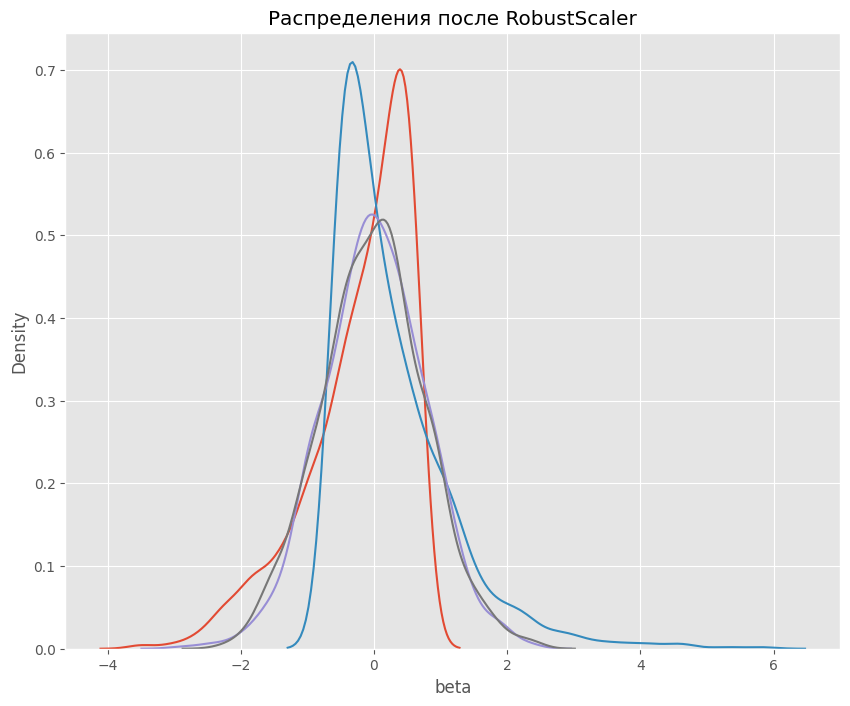

In [8]:
# инициализируем нормализатор RobustScaler
r_scaler = preprocessing.RobustScaler()

# кодируем исходный датасет
df_r = r_scaler.fit_transform(df)

# Преобразуем промежуточный датасет в полноценный датафрейм для визуализации
df_r = pd.DataFrame(df_r, columns=col_names)

fig, (ax1) = plt.subplots(ncols=1, figsize=(10, 8))
ax1.set_title('Распределения после RobustScaler')

sns.kdeplot(df_r['beta'], ax=ax1)
sns.kdeplot(df_r['exponential'], ax=ax1)
sns.kdeplot(df_r['normal_p'], ax=ax1)
sns.kdeplot(df_r['normal_l'], ax=ax1)